## CA4022 - Assignment 3 - Visialisations

This notebook was used to concatenate the output from Pig for each of the review categories. These were then taken separately to create several visualisations to give us insight into how the ratings were distibuted and also grouped by user.

We felt that considering our plan will be to use a collaborative filtering approach that it was best to focus on the ratings which will be used to calculate the latent representation of the user and item matrices. 

Looking at the highly rated items would be interesting, but will not contribute to an improvement in our model (Unless high rated movies are recommeneded more often, but this can be addressed with the choice of similarty metric).

In [55]:
import pandas as pd
from pathlib import Path
import seaborn as sns

### Loading in the data

The data was output from Pig in several directories, one for each category we plan to use. These are books, video games and video DVD. These directories contained several outputs from map functions and was segmeneted as a result. So we had to read in these files and concatenate them into one dataframe for each category.

We will check for data quality as we move through all stages, checking for nulls or invalid values. There were several entries in a video DVD file that were invalid with missing value an invalid country code. 

In [33]:
# Get the column headers as these are not contained in the files.
columns = ["marketplace", "customer_id", "review_id", "product_id", "product_parent", "product_title", "product_category", "rating", "helpful_votes", "total_votes"]

for p in Path("D:/DS/DS4/CA4022 - Data at Speed and Scale/ca4022-assignment-3/amazon_reviews").iterdir():
    
    # Create a new DataFrame
    current_data = None
    for f in p.iterdir():
        if f.name[:4] == "part":
            
            # Read in the data from this file
            data_from_file = pd.read_csv(f, sep="\t")
            # Check the shape of the df
            print(data_from_file.shape)
            data_from_file.columns = columns
            
            # If this is the first data we have read, set current to this df. 
            # Otherwise, append it to what we have already read in.
            if current_data is None:
                current_data = data_from_file
            else:
                current_data = pd.concat([current_data, data_from_file], ignore_index=True)
                
            print("current:", current_data.shape)
    
    # Get the name of the category these reviews are from. Should be a single unique value
    unique_cat = current_data["product_category"].unique()
    if len(unique_cat) > 1:
        print(unique_cat)
        print("There is more than one category in this data.")
    current_data.to_csv(Path(f.parent / f"total_{unique_cat[0]}.csv"), index=False)

(992129, 10)
current: (992129, 10)
(992085, 10)
current: (1984214, 10)
(991919, 10)
current: (2976133, 10)
(991670, 10)
current: (3967803, 10)
['Video DVD' nan]
Not correct
(893609, 10)
current: (893609, 10)
(892334, 10)
current: (1785943, 10)


### Visualisations

#### Video Games

We started by looking at the reviews for Video Games. The plan was to read in the data and check for nulls. 

Following this we want to analyse the distribution of the ratings and then the distribution of average user ratings. In particular, the average user rating may be important as not all users rate in the same way. Some users are lenient while others are harsh when it comes to rating. We have to take a users average rating into account. This is because a 3 for one user may be equivalent to a 1, meaning we need to look at it with regard to their other movie ratings. In this way we can understand if they liked or disliked a movie if the rating is above or below this average.

In [34]:
games = pd.read_csv("D:/DS/DS4/CA4022 - Data at Speed and Scale/ca4022-assignment-3/amazon_reviews/total_Video Games.csv")

In [114]:
games.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,rating,helpful_votes,total_votes
0,US,10114,RPQVPLU3SM5YZ,B0036VSD3G,246117972,Nintendo Dsi/DS Lite - 20 In 1 Travel Kit,Video Games,5,0,0
1,US,10146,R74GMD9AKI9TK,B002I0J5FG,335319964,The ICO and Shadow of the Colossus Collection,Video Games,5,1,1
2,US,10206,R1ALPEI2SO0D1,B00HNYWFMC,805852390,Far Cry Compliation,Video Games,5,0,0
3,US,10206,RKGTCKYPCL84J,B004X56PWK,936485702,Sonic Generations,Video Games,5,0,0
4,US,10206,RLQIPPSIW9KQ0,B0053WVBSA,603885070,Happy Feet Two: The Videogame,Video Games,3,0,1


In [40]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785943 entries, 0 to 1785942
Data columns (total 10 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   marketplace       object
 1   customer_id       int64 
 2   review_id         object
 3   product_id        object
 4   product_parent    int64 
 5   product_title     object
 6   product_category  object
 7   rating            int64 
 8   helpful_votes     int64 
 9   total_votes       int64 
dtypes: int64(5), object(5)
memory usage: 136.3+ MB


In [46]:
games.isnull().sum()

marketplace         0
customer_id         0
review_id           0
product_id          0
product_parent      0
product_title       0
product_category    0
rating              0
helpful_votes       0
total_votes         0
dtype: int64

In [99]:
ratings = games[["customer_id", "rating"]].groupby("rating").count()
ratings.columns = ["Count"]
ratings = ratings.reset_index()

In [110]:
ratings["Count"] = ratings["Count"] / 1000

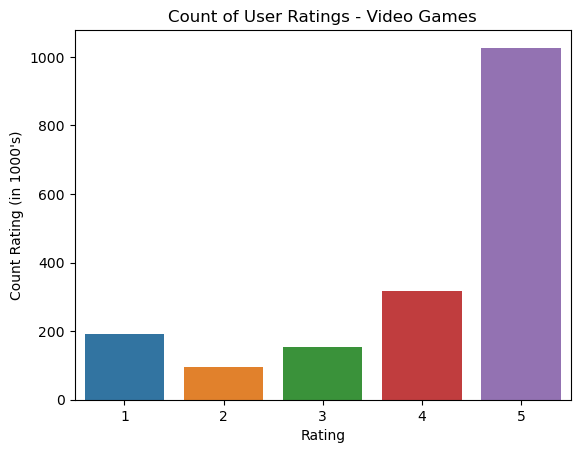

In [125]:
c = sns.barplot(data=ratings, x="rating", y="Count")
c.set_title("Count of User Ratings - Video Games")
c.set(xlabel="Rating",
      ylabel="Count Rating (in 1000's)");

In [64]:
customers = games[["customer_id", "rating"]].groupby("customer_id").mean()

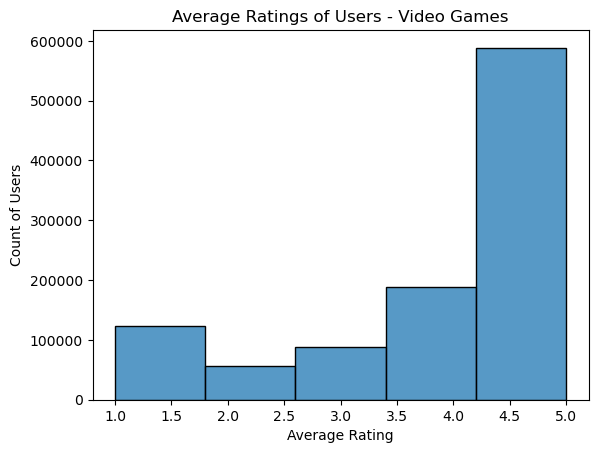

In [126]:
c = sns.histplot(data=customers, x="rating", bins=5)
c.set_title("Average Ratings of Users - Video Games")
c.set(xlabel="Average Rating",
      ylabel="Count of Users");

#### Books

Next we looked at the book category, carrying out the same steps as before.

In [127]:
books = pd.read_csv("D:/DS/DS4/CA4022 - Data at Speed and Scale/ca4022-assignment-3/amazon_reviews/total_Books.csv")

In [128]:
books.isnull().sum()

marketplace         0
customer_id         0
review_id           0
product_id          0
product_parent      0
product_title       0
product_category    0
rating              0
helpful_votes       0
total_votes         0
dtype: int64

In [129]:
ratings = books[["customer_id", "rating"]].groupby("rating").count()
ratings.columns = ["Count"]
ratings = ratings.reset_index()

In [130]:
ratings["Count"] = ratings["Count"] / 1000

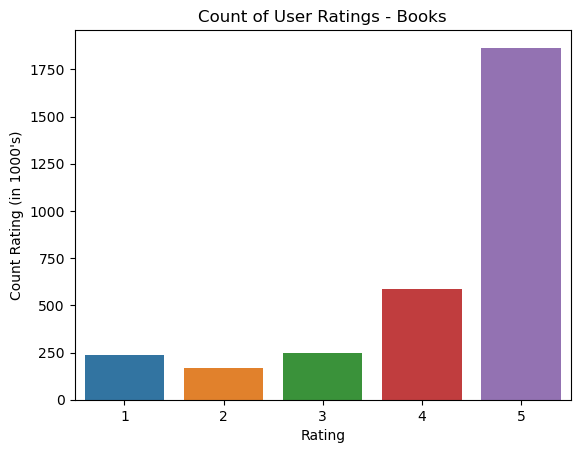

In [137]:
c = sns.barplot(data=ratings, x="rating", y="Count")
c.set_title("Count of User Ratings - Books")
c.set(xlabel="Rating",
      ylabel="Count Rating (in 1000's)");

In [134]:
customers = books[["customer_id", "rating"]].groupby("customer_id").mean()

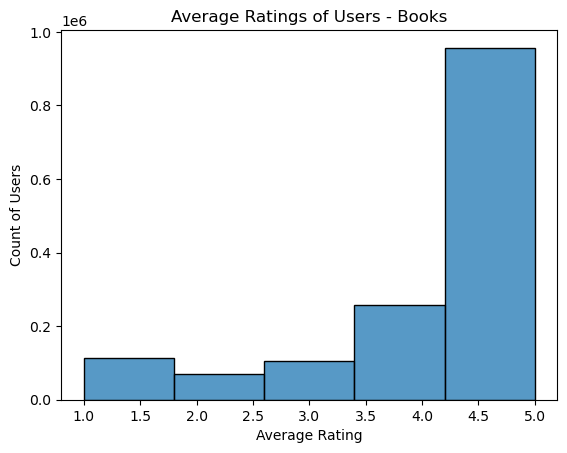

In [136]:
c = sns.histplot(data=customers, x="rating", bins=5)
c.set_title("Average Ratings of Users - Books")
c.set(xlabel="Average Rating",
      ylabel="Count of Users");

#### Video DVD

Next we looked at the Video DVD category, carrying out the same steps as before.

In [138]:
dvd = pd.read_csv("D:/DS/DS4/CA4022 - Data at Speed and Scale/ca4022-assignment-3/amazon_reviews/total_Video DVD.csv")

In [139]:
dvd.isnull().sum()

marketplace         0
customer_id         0
review_id           0
product_id          0
product_parent      0
product_title       0
product_category    2
rating              2
helpful_votes       2
total_votes         2
dtype: int64

In [144]:
# Remove the null values
dvd = dvd[~dvd.isna().any(axis=1)]

marketplace         0
customer_id         0
review_id           0
product_id          0
product_parent      0
product_title       0
product_category    0
rating              0
helpful_votes       0
total_votes         0
dtype: int64

In [145]:
ratings = dvd[["customer_id", "rating"]].groupby("rating").count()
ratings.columns = ["Count"]
ratings = ratings.reset_index()

In [146]:
ratings["Count"] = ratings["Count"] / 1000

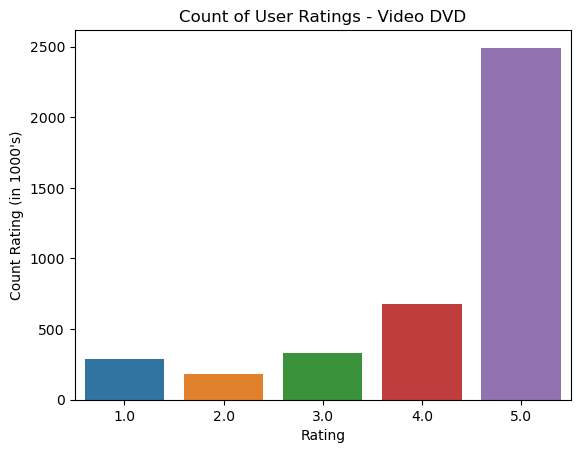

In [147]:
c = sns.barplot(data=ratings, x="rating", y="Count")
c.set_title("Count of User Ratings - Video DVD")
c.set(xlabel="Rating",
      ylabel="Count Rating (in 1000's)");

In [148]:
customers = dvd[["customer_id", "rating"]].groupby("customer_id").mean()

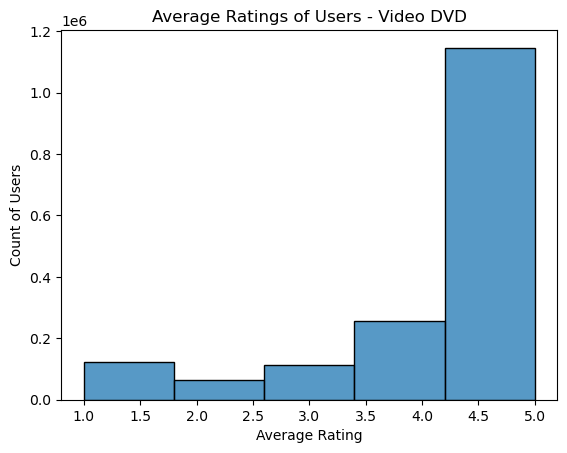

In [149]:
c = sns.histplot(data=customers, x="rating", bins=5)
c.set_title("Average Ratings of Users - Video DVD")
c.set(xlabel="Average Rating",
      ylabel="Count of Users");